### Imports

In [4]:

import matplotlib.pyplot as plt
import numpy as np 
from numpy.linalg import norm
import torch 
import torch.nn.functional as F
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from matplotlib.ticker import FuncFormatter
import pandas as pd
from scipy.spatial import KDTree, cKDTree

### Dataset

In [5]:
df = pd.read_csv("result (6).csv", lineterminator='\n', low_memory=False)
df = df.iloc[:301009]

tory_df = pd.read_csv('tory.csv', lineterminator='\n', low_memory=False)
tory_df = tory_df.iloc[:182865]

mps = pd.read_csv("Seun - Sheet1.csv")
tory_mps = pd.read_csv('tory_mp.csv')

mps = mps['MPs'].tolist()
tory_mps = tory_mps['MPs'].tolist()

tory_df = tory_df[~tory_df['profileUrl'].isin(tory_mps)]
df = df[~df['profileUrl'].isin(mps)]

num_unique_entries = df['profileUrl'].unique().tolist()
num_unique_mps = df["query"].unique().tolist()

num_unique_tory_entries = tory_df['profileUrl'].unique().tolist()

num_unqiue_tory_mps = tory_df["query"].unique().tolist()

In [6]:
all_mps = set(num_unique_mps + num_unqiue_tory_mps)

In [7]:
print(num_unique_mps)
labourCount = 0
conservativeCount = 0
clusterOne = ['https://www.twitter.com/Anna_Firth', 'https://www.twitter.com/BBradley_Mans', 'https://www.twitter.com/JonCruddas_1', 'https://www.twitter.com/NiaGriffithMP', 'https://www.twitter.com/DehennaDavison', 'https://www.twitter.com/bhatti_saqib', 'https://www.twitter.com/jogideon', 'https://www.twitter.com/margarethodge', 'https://www.twitter.com/laura__farris', 'https://www.twitter.com/jdjanogly', 'https://www.twitter.com/JamesDavies', 'https://www.twitter.com/AlunCairns', 'https://www.twitter.com/baynes_simon', 'https://www.twitter.com/GeorgeFreemanMP', 'https://www.twitter.com/AdamAfriyie', 'https://www.twitter.com/KeeleyMP', 'https://www.twitter.com/DrRosena', 'https://www.twitter.com/kimleadbeater', 'https://www.twitter.com/DamianCollins', 'https://www.twitter.com/JulieElliottMP', 'https://www.twitter.com/lucyallan', 'https://www.twitter.com/PreetKGillMP', 'https://www.twitter.com/AnnelieseDodds', 'https://www.twitter.com/SharonHodgsonMP', 'https://www.twitter.com/marcusfysh', 'https://www.twitter.com/LouHaigh', 'https://www.twitter.com/rach_hopkins', 'https://www.twitter.com/RupaHuq', 'https://www.twitter.com/PaulaBarkerMP', 'https://www.twitter.com/Bill_Esterson', 'https://www.twitter.com/MikeKaneMP', 'https://www.twitter.com/Nus_Ghani', 'https://www.twitter.com/tony4rochdale', 'https://www.twitter.com/ElliotColburn', 'https://www.twitter.com/JamesDuddridge', 'https://www.twitter.com/DianaJohnsonMP', 'https://www.twitter.com/JackieDP', 'https://www.twitter.com/Dunne4Ludlow', 'https://www.twitter.com/theresecoffey', 'https://www.twitter.com/BarryGardiner', 'https://www.twitter.com/michelledonelan', 'https://www.twitter.com/SarahChampionMP', 'https://www.twitter.com/Dines4Dales', 'https://www.twitter.com/MikeAmesburyMP', 'https://www.twitter.com/nickfletchermp', 'https://www.twitter.com/_oliviablake', 'https://www.twitter.com/AndrewBowie_MP', 'https://www.twitter.com/ClaireCoutinho', 'https://www.twitter.com/KimJohnsonMP', 'https://www.twitter.com/jamesdalymp', 'https://www.twitter.com/NatalieElphicke', 'https://www.twitter.com/AlexDaviesJones', 'https://www.twitter.com/DanJarvisMP', 'https://www.twitter.com/FelicityBuchan', 'https://www.twitter.com/hbaldwin', 'https://www.twitter.com/michael_ellis1', 'https://www.twitter.com/MPIainDS', 'https://www.twitter.com/Siobhan_Baillie', 'https://www.twitter.com/ChrisClarksonMP', 'https://www.twitter.com/peter_aldous', 'https://www.twitter.com/CliveEfford', 'https://www.twitter.com/ApsanaBegumMP', 'https://www.twitter.com/nickgibbuk', 'https://www.twitter.com/daviddavismp', 'https://www.twitter.com/SDoughtyMP', 'https://www.twitter.com/SeemaMalhotra1', 'https://www.twitter.com/LeoDochertyUK', 'https://www.twitter.com/Mike_Fabricant', 'https://www.twitter.com/Meg_HillierMP', 'https://www.twitter.com/GeraldJonesLAB', 'https://www.twitter.com/leicesterliz', 'https://www.twitter.com/KevinBrennanMP', 'https://www.twitter.com/SKinnock', 'https://www.twitter.com/david_duguid', 'https://www.twitter.com/Ben_Everitt', 'https://www.twitter.com/simonfell', 'https://www.twitter.com/robertcourts', 'https://www.twitter.com/SarahEdwardsTam', 'https://www.twitter.com/AaronBell4NUL', 'https://www.twitter.com/JonAshworth', 'https://www.twitter.com/duncancbaker', 'https://www.twitter.com/RobBAylesbury', 'https://www.twitter.com/MGreenwoodWW', 'https://www.twitter.com/StuartAndrew', 'https://www.twitter.com/theodoraclarke', 'https://www.twitter.com/carolynharris24', 'https://www.twitter.com/davidevennettmp', 'https://www.twitter.com/MpHendrick', 'https://www.twitter.com/GarethBaconMP', 'https://www.twitter.com/BrineMP', 'https://www.twitter.com/FloEshalomi', 'https://www.twitter.com/PaulBlomfieldMP', 'https://www.twitter.com/Afzal4Gorton', 'https://www.twitter.com/Mark4WyreForest', 'https://www.twitter.com/JakeBerry', 'https://www.twitter.com/richardbaconmp']
size = len(clusterOne)
for mp in clusterOne:
    if mp in num_unique_mps:
        labourCount += 1
    elif mp in num_unqiue_tory_mps:
        conservativeCount += 1
    else:
        pass
print("Pecentage of Labour MPs in the first Cluster = ", labourCount/size)
print("Pecentage of Conservative MPs in the first Cluster = ", conservativeCount/size)

print("Pecentage of Labour MPs in the second Cluster = ", 1 - labourCount/size)
print("Pecentage of Conservative MPs in the second Cluster = ", 1 - conservativeCount/size)

['https://www.twitter.com/Debbie_abrahams', 'https://www.twitter.com/TahirAliMP', 'https://www.twitter.com/MikeAmesburyMP', 'https://www.twitter.com/ToniaAntoniazzi', 'https://www.twitter.com/PaulaBarkerMP', 'https://www.twitter.com/ApsanaBegumMP', 'https://www.twitter.com/clive_betts', 'https://www.twitter.com/PaulBlomfieldMP', 'https://www.twitter.com/KevinBrennanMP', 'https://www.twitter.com/RhonddaBryant', 'https://www.twitter.com/rushanaraali', 'https://www.twitter.com/DrRosena', 'https://www.twitter.com/PutneyFleur', 'https://www.twitter.com/hilarybennmp', 'https://www.twitter.com/JonAshworth', 'https://www.twitter.com/_oliviablake', 'https://www.twitter.com/BenPBradshaw', 'https://www.twitter.com/lynbrownmp', 'https://www.twitter.com/KarenPBuckMP', 'https://www.twitter.com/RichardBurgon', 'https://www.twitter.com/IanByrneMP', 'https://www.twitter.com/RuthCadbury', 'https://www.twitter.com/DanCardenMP', 'https://www.twitter.com/FeryalClark', 'https://www.twitter.com/coyleneil', '

In [8]:
print(len(num_unique_mps))

100


### Code

Unsupervised Vector-Bundle

In [9]:
def kmeans_cluster(embeddings, n_cluster = 2):
    kmeans = KMeans(n_clusters=n_cluster).fit(embeddings)
    # kmeans = KMeans(n_clusters=n_cluster).fit_predict(embeddings)
    centres =  kmeans.cluster_centers_
    labels = kmeans.labels_
    print(embeddings.shape, centres.shape)
    return centres, labels

In [10]:
def normalize_vector(vector):
    norm = np.linalg.norm(vector)
    if norm == 0:
        return vector
    
    return vector / norm

def compute_opinion_values(embeddings, projection_vector):
    normalized_projection_vector = normalize_vector(projection_vector)
    opinion_values = np.array([np.dot(normalize_vector(embedding), normalized_projection_vector) for embedding in embeddings])
    return opinion_values

def get_projection_vector(cluster_centres):
    vP = cluster_centres[0] - cluster_centres[1]
    return vP


In [11]:
def cosinesimilarity(vector1, vector2):
    return np.dot(vector1, vector2) / (np.linalg.norm(vector1) * np.linalg.norm(vector2))

(199, 2) (2, 2)
[-4.482375    0.32925498]
here 0.98403953645745
here [-2.7132318 -2.2760653] [2.4740486 0.5574618]


C:\Users\seuna\AppData\Local\Temp\ipykernel_23072\875360150.py:18: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1], cmap='viridis')


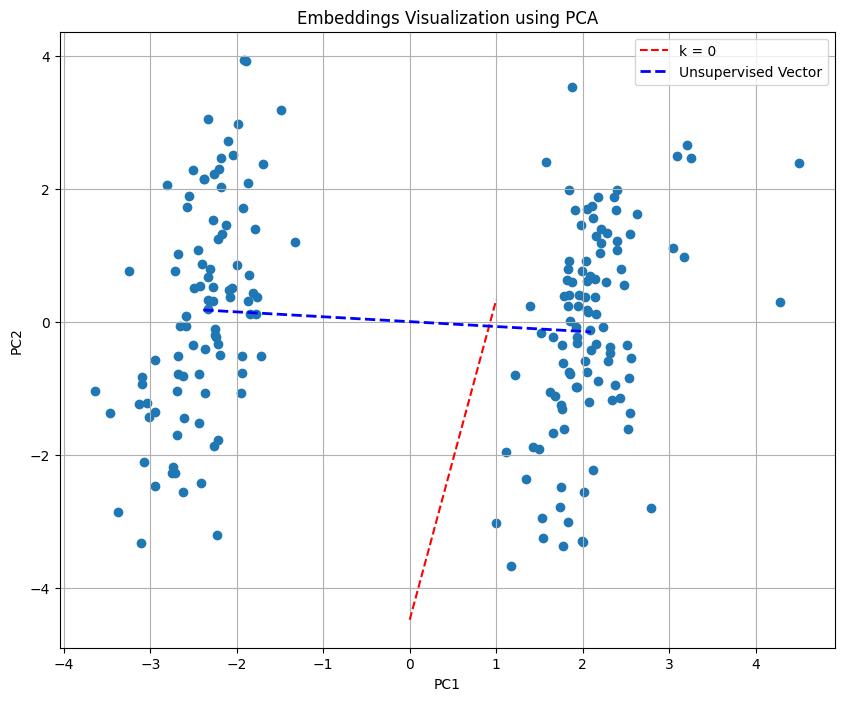

In [25]:
model = torch.load('lastOne.pth')
def extract_embeddings(model):
    embeddings = model['u_embeddings.weight'].data.numpy()
    return embeddings

def pca(embeddings):
    pca = PCA(n_components=2)
                                   
    embeddings_2d = pca.fit_transform(embeddings)
    
    centres, labels = kmeans_cluster(embeddings_2d, 2)           
    projection_vector = get_projection_vector(centres)
    
    print(projection_vector)
    opinion_values = compute_opinion_values(embeddings_2d, projection_vector)
    
    plt.figure(figsize=(10, 8))
    plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1], cmap='viridis')
    additional_vector = np.array([-0.52352816 , 0.13492116])
    additional_vector1 = np.array([-0.58941895 , 0.13068032])
    additional_vector2 = np.array([-0.53450996 , 0.13421434])
    additional_vector3 = np.array([-0.52352816 , 0.13492116])
    
    scalar_factor = 3.5
    extended_vector_positive = additional_vector * scalar_factor
    extended_vector_negative = -additional_vector * scalar_factor
    
    extended_vector_positive1 = additional_vector1 * scalar_factor
    extended_vector_negative1 = -additional_vector1 * scalar_factor
    
    extended_vector_positive2 = additional_vector2 * scalar_factor
    extended_vector_negative2 = -additional_vector2 * scalar_factor
    
    extended_vector_positive3 = additional_vector3 * scalar_factor
    extended_vector_negative3 = -additional_vector3 * scalar_factor
    
    plt.plot(projection_vector, color='red', linestyle='dashed', label = 'k = 0')
        
    # plt.plot([0, extended_vector_positive3[0]], [0, extended_vector_positive3[1]], color='blue', linestyle='dashed')  # Positive extension
    # plt.plot([0, extended_vector_negative3[0]], [0, extended_vector_negative3[1]], color='blue', linestyle='dashed', label = 'k = 1')  # Negative extension
    
    
    # plt.plot([0, extended_vector_positive[0]], [0, extended_vector_positive[1]], color='black', linestyle='dashed')  # Positive extension
    # plt.plot([0, extended_vector_negative[0]], [0, extended_vector_negative[1]], color='black', linestyle='dashed', label = 'k = 5')  # Negative extension
    
    # plt.plot([0, extended_vector_positive1[0]], [0, extended_vector_positive1[1]], color='green',linestyle='dashed')  # Positive extension
    # plt.plot([0, extended_vector_negative1[0]], [0, extended_vector_negative1[1]], color='green',linestyle='dashed', label = 'k = 10')  # Negative extension
    
    # plt.plot([0, extended_vector_positive2[0]], [0, extended_vector_positive2[1]], color='brown', linestyle='dashed')  # Positive extension
    # plt.plot([0, extended_vector_negative2[0]], [0, extended_vector_negative2[1]], color='brown', linestyle='dashed', label = 'k = 20')  # Negative extension

    
    
    compare = np.array([centres[0][0] - centres[1][0], centres[0][1] - centres[1][1]])
    print('here', cosinesimilarity(compare, [-0.52352816 , 0.13492116]))
    plt.plot([centres[0][0], centres[1][0]], [centres[0][1], centres[1][1]], 'b--', linewidth=2,label='Unsupervised Vector')
    plt.title('Embeddings Visualization using PCA')
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.legend()
    plt.grid(True)
    
    point_cluster_0 = embeddings_2d[labels == 0][67]
    point_cluster_1 = embeddings_2d[labels == 1][7]
    
    print('here', point_cluster_0, point_cluster_1)
    return opinion_values, point_cluster_0, point_cluster_1, embeddings_2d, labels

    
    

embeddings = extract_embeddings(model)
opinion_values,  point1, point2, embeddings, labels = pca(embeddings)

In [34]:
print(len(embeddings[labels == 0]))

93


In [35]:
print(len(embeddings))

199


In [1]:
def cosinesimilarity(vector1, vector2):
    return np.dot(vector1, vector2) / (np.linalg.norm(vector1) * np.linalg.norm(vector2))

In [37]:
additional_vector = np.array([-0.52352816 , 0.13492116])
additional_vector1 = np.array([-0.58941895 , 0.13068032])
additional_vector2 = np.array([-0.53450996 , 0.13421434])
additional_vector3 = np.array([-0.52352816 , 0.13492116])
    
print(cosinesimilarity(additional_vector3, additional_vector))
print(cosinesimilarity(additional_vector3, additional_vector1))
print(cosinesimilarity(additional_vector3, additional_vector2))
print(cosinesimilarity(additional_vector3, additional_vector3))

0.9999999999999998
0.9994205057601351
0.9999806869425564
0.9999999999999998


In [38]:
def supervisedVectorBundling(embeddings, point1, point2):
    projectionVector = point2 - point1
    print(projectionVector)
    V = [] 
    m = 10
    s = 10
    similarVectors = []
    n = len(embeddings)
    tree = KDTree(embeddings)
    
    for account in range(n):
        politicalAccount = embeddings[account]
        ds, inds = tree.query([politicalAccount], k=m)
        nearestNeighbours = embeddings[inds[0]]
        for point in nearestNeighbours:
            pV = politicalAccount - point
            V.append(pV)
            
    similarities = np.unique([cosinesimilarity(np.abs(k), projectionVector) for k in V])
    top_indicies = np.argsort(similarities)[-s:]
    
    for idx in top_indicies:
        similarVectors.append(V[idx])
        
    for idx, vector in enumerate(similarVectors):
        normalised_vector = vector / np.linalg.norm(vector)
        if np.isnan(normalised_vector).any():
            del similarVectors[idx]
        else:
            similarVectors[idx] = vector / np.linalg.norm(vector)
        
    averageVector = np.mean(similarVectors, axis=0)
    return averageVector
        

### Unsupervised 

199


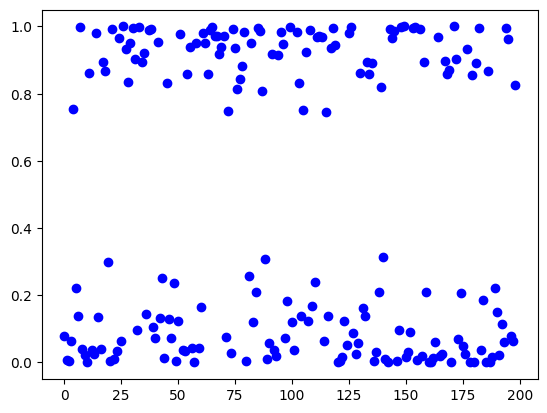

In [39]:
supervised_opinions = (opinion_values - np.min(opinion_values)) / (np.max(opinion_values) - np.min(opinion_values))
print(len(supervised_opinions))
plt.scatter(range(len(supervised_opinions)), supervised_opinions, color='blue', label='Values')
plt.show()

In [40]:
def to_percent(y, position):
    # Convert decimal to percentage
    s = str(10 * y)
    # Use LaTeX to format label with percentage symbol
    return s + '%'

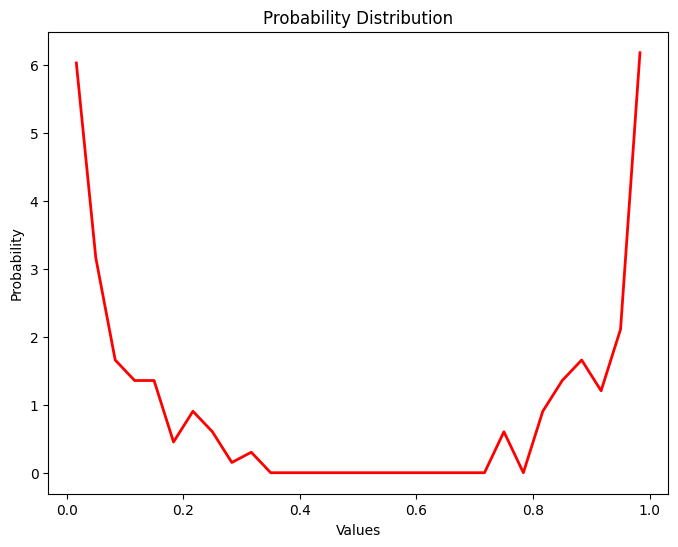

In [41]:
hist, bins = np.histogram(supervised_opinions, bins=30, density=True)  # Calculate histogram and normalize by density

# Step 4: Plot the distribution
plt.figure(figsize=(8, 6))
# plt.hist(supervised_opinions, bins=bins, density=True, alpha=0.6, color='g', edgecolor='black')  # Plot histogram
plt.plot((bins[:-1] + bins[1:]) / 2, hist, color='r', linewidth=2)  # Plot probability distribution
plt.title('Probability Distribution')
plt.xlabel('Values')
plt.ylabel('Probability')
# plt.gca().yaxis.set_major_formatter(FuncFormatter(to_percent))
plt.show()

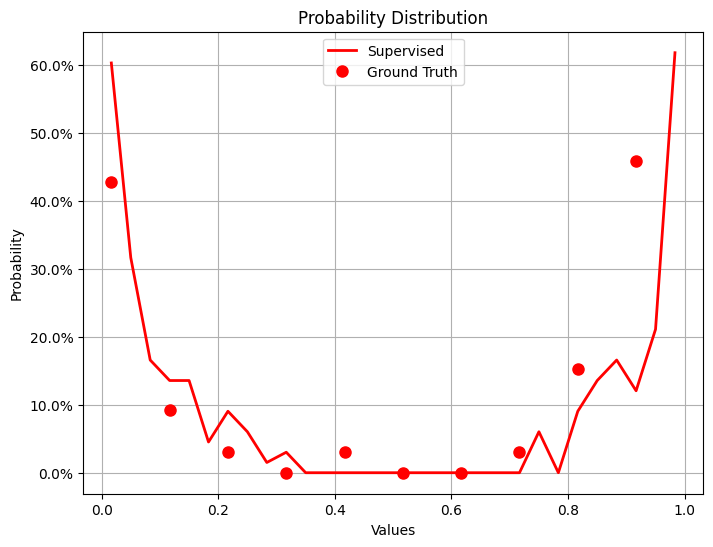

In [42]:
hist, bins = np.histogram(supervised_opinions, bins=30, density=True)  # Calculate histogram and normalize by density
bin_centers = [0.01666667, 0.11666667, 0.21666667, 0.31666667, 0.41666667, 0.51666667, 0.61666667, 0.71666667, 0.81666667, 0.91666667]
hist_points = [4.28571429, 0.91836735, 0.30612245, 0., 0.30612245, 0., 0., 0.30612245, 1.53061224, 4.59183673]

plt.figure(figsize=(8, 6))
plt.plot((bins[:-1] + bins[1:]) / 2, hist, color='r', linewidth=2, label = 'Supervised')  # Plot probability distribution
plt.plot(bin_centers, hist_points, 'ro', markersize=8, label = 'Ground Truth')  # Plot probability distribution with points
plt.title('Probability Distribution')
plt.xlabel('Values')
plt.ylabel('Probability')
plt.gca().yaxis.set_major_formatter(FuncFormatter(to_percent))
plt.legend()
plt.grid(True)
plt.show()


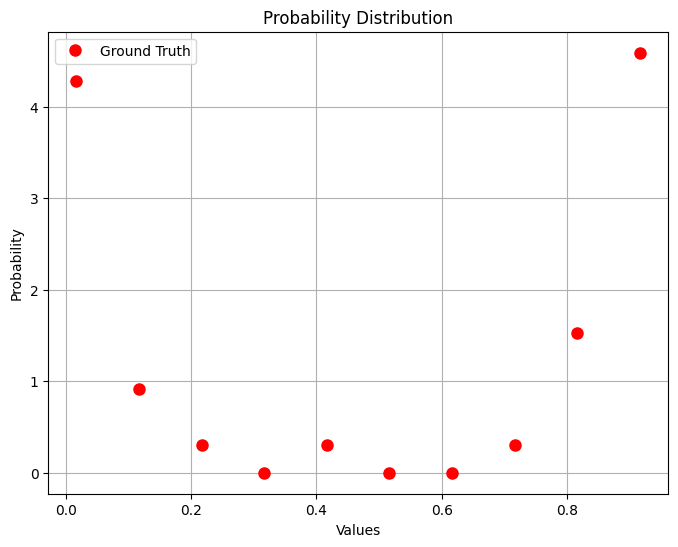

In [43]:
bin_centers = [0.01666667, 0.11666667, 0.21666667, 0.31666667, 0.41666667, 0.51666667, 0.61666667, 0.71666667, 0.81666667, 0.91666667]
hist_points = [4.28571429, 0.91836735, 0.30612245, 0., 0.30612245, 0., 0., 0.30612245, 1.53061224, 4.59183673]

plt.figure(figsize=(8, 6))
plt.plot(bin_centers, hist_points, 'ro', markersize=8, label = 'Ground Truth')  # Plot probability distribution with points
plt.title('Probability Distribution')
plt.xlabel('Values')
plt.ylabel('Probability')
plt.grid(True)
plt.legend()
plt.show()

### Supervised

In [44]:
def performAverageSupervisedBundling(k):
    V = []
    for _ in range(k):
        i = np.random.randint(0, len(embeddings[labels==0]))
        point_0 = embeddings[labels==0][i]
        point_1 = embeddings[labels==1][np.random.randint(0, len(embeddings[labels==1]))]
        V.append(supervisedVectorBundling(embeddings, point_0, point_1))
    V = np.array(V)
    average = np.mean(V, axis=0)
    return average

print('average', performAverageSupervisedBundling(1))

[4.2586813 1.5045584]
average [-0.74316424  0.120785  ]


C:\Users\seuna\AppData\Local\Temp\ipykernel_9576\591409747.py:2: RuntimeWarning: invalid value encountered in scalar divide
  return np.dot(vector1, vector2) / (np.linalg.norm(vector1) * np.linalg.norm(vector2))
C:\Users\seuna\AppData\Local\Temp\ipykernel_9576\2736786431.py:26: RuntimeWarning: invalid value encountered in divide
  normalised_vector = vector / np.linalg.norm(vector)


[5.1872807 2.833527 ]
here [-0.52352816  0.13492116]


C:\Users\seuna\AppData\Local\Temp\ipykernel_9576\591409747.py:2: RuntimeWarning: invalid value encountered in scalar divide
  return np.dot(vector1, vector2) / (np.linalg.norm(vector1) * np.linalg.norm(vector2))
C:\Users\seuna\AppData\Local\Temp\ipykernel_9576\2736786431.py:26: RuntimeWarning: invalid value encountered in divide
  normalised_vector = vector / np.linalg.norm(vector)


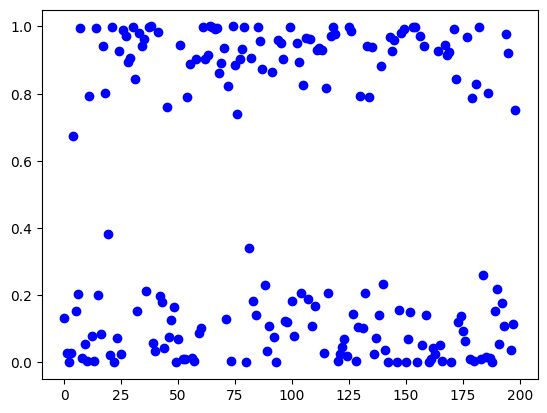

In [45]:
averageVector = supervisedVectorBundling(embeddings, point1, point2)
print('here', averageVector)
opinion_values = compute_opinion_values(embeddings, averageVector)
unsupervised_opinions = (opinion_values - np.min(opinion_values)) / (np.max(opinion_values) - np.min(opinion_values))

plt.scatter(range(len(unsupervised_opinions)), unsupervised_opinions, color='blue', label='Values')
plt.show()

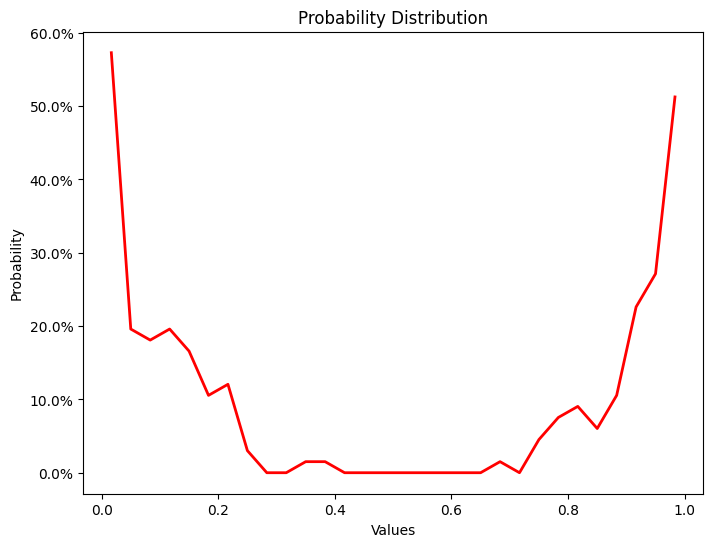

In [46]:
hist, bins = np.histogram(unsupervised_opinions, bins=30, density=True)  # Calculate histogram and normalize by density

# Step 4: Plot the distribution
plt.figure(figsize=(8, 6))
# plt.hist(unsupervised_opinions, bins=bins, density=True, alpha=0.6, color='g', edgecolor='black')  # Plot histogram
plt.plot((bins[:-1] + bins[1:]) / 2, hist, color='r', linewidth=2)  # Plot probability distribution
plt.title('Probability Distribution')
plt.xlabel('Values')
plt.ylabel('Probability')
plt.gca().yaxis.set_major_formatter(FuncFormatter(to_percent))
plt.show()


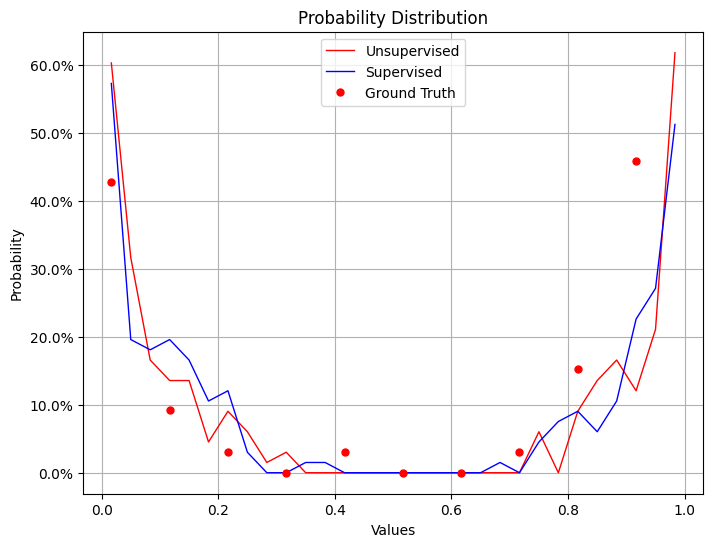

In [47]:
hist, bins = np.histogram(supervised_opinions, bins=30, density=True)  # Calculate histogram and normalize by density
hist_u, bins_u = np.histogram(unsupervised_opinions, bins=30, density=True)  # Calculate histogram and normalize by density

bin_centers = [0.01666667, 0.11666667, 0.21666667, 0.31666667, 0.41666667, 0.51666667, 0.61666667, 0.71666667, 0.81666667, 0.91666667]
hist_points = [4.28571429, 0.91836735, 0.30612245, 0., 0.30612245, 0., 0., 0.30612245, 1.53061224, 4.59183673]

plt.figure(figsize=(8, 6))
plt.plot((bins[:-1] + bins[1:]) / 2, hist, color='r', linewidth=1, label = 'Unsupervised')  # Plot probability distribution
plt.plot((bins_u[:-1] + bins_u[1:]) / 2, hist_u, color='b', linewidth=1, label = 'Supervised')  # Plot probability distribution
plt.plot(bin_centers, hist_points, 'ro', markersize=5, label = 'Ground Truth')  # Plot probability distribution with points
plt.title('Probability Distribution')
plt.xlabel('Values')
plt.ylabel('Probability')
plt.gca().yaxis.set_major_formatter(FuncFormatter(to_percent))
plt.legend()
plt.grid(True)
# plt.xscale('log')
plt.show()


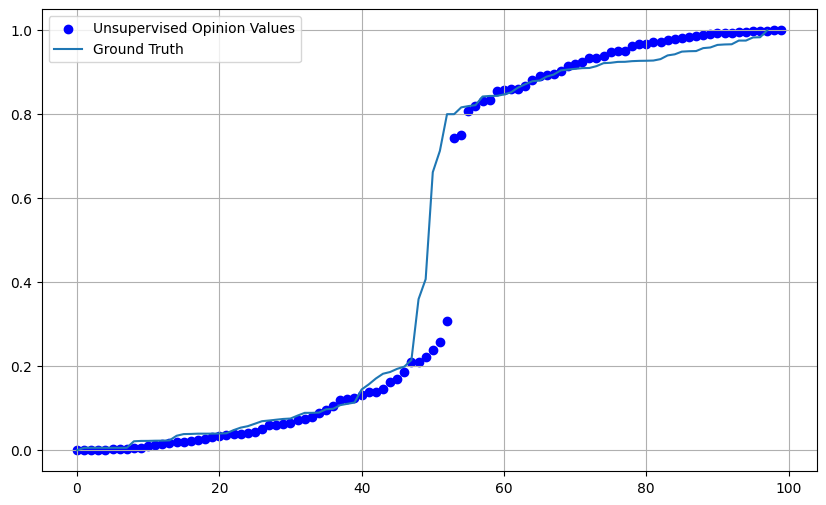

In [55]:
x = [0.        , 0.00586759, 0.00586759, 0.00586759, 0.00586759,
       0.00586759, 0.00586759, 0.00586759, 0.02140048, 0.02226978,
       0.0223582 , 0.02277183, 0.02291975, 0.02360203, 0.03452304,
       0.03856703, 0.03889019, 0.03955777, 0.03955777, 0.0395881 ,
       0.03997284, 0.04043485, 0.04791295, 0.05389082, 0.05735864,
       0.06321873, 0.06920969, 0.07087991, 0.07279493, 0.07460491,
       0.07554103, 0.08257939, 0.0890898 , 0.08912833, 0.08975118,
       0.09754461, 0.09880473, 0.10748557, 0.11064543, 0.11366086,
       0.14473529, 0.15683061, 0.17084613, 0.18220679, 0.18632215,
       0.19393067, 0.19910292, 0.21503828, 0.35978601, 0.40739159,
       0.66206196, 0.71296123, 0.80024661, 0.80027563, 0.81645631,
       0.81947959, 0.82173394, 0.84232142, 0.8436567 , 0.84384   ,
       0.84723218, 0.85224428, 0.86375955, 0.87148698, 0.87871188,
       0.88029809, 0.88966309, 0.89459195, 0.90453715, 0.90652234,
       0.9081576 , 0.90987528, 0.91019704, 0.914622  , 0.9217295 ,
       0.92259851, 0.92473787, 0.92492076, 0.92648878, 0.92718617,
       0.92744651, 0.92795475, 0.93132633, 0.94016185, 0.94274834,
       0.94919565, 0.95012482, 0.95049706, 0.95752146, 0.95906755,
       0.965154  , 0.96621994, 0.96668771, 0.97546974, 0.97546974,
       0.98294784, 0.98342648, 1.        ]

supervised_opinions.sort()
plt.figure(figsize=(10, 6))
plt.scatter(range(len(supervised_opinions[::2])), supervised_opinions[::2], color='blue', label='Unsupervised Opinion Values')
plt.plot(x, label = 'Ground Truth')
plt.grid(True)
plt.legend()
plt.show()

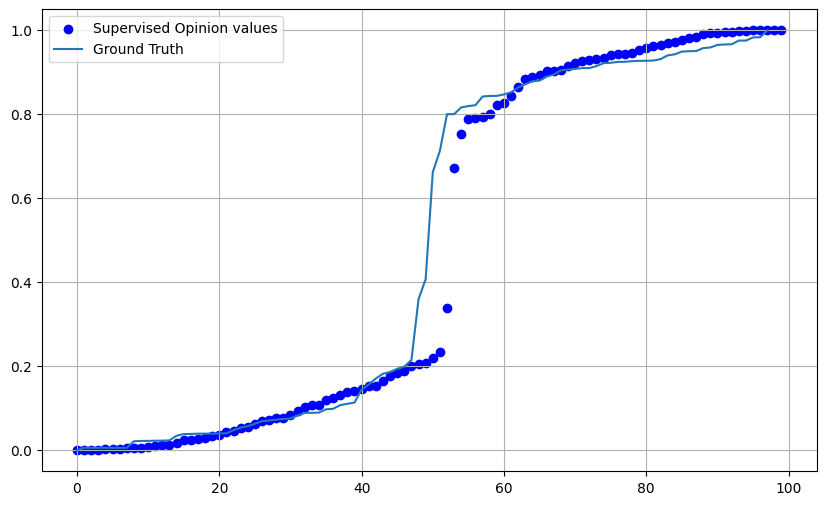

In [53]:
x = [0.        , 0.00586759, 0.00586759, 0.00586759, 0.00586759,
       0.00586759, 0.00586759, 0.00586759, 0.02140048, 0.02226978,
       0.0223582 , 0.02277183, 0.02291975, 0.02360203, 0.03452304,
       0.03856703, 0.03889019, 0.03955777, 0.03955777, 0.0395881 ,
       0.03997284, 0.04043485, 0.04791295, 0.05389082, 0.05735864,
       0.06321873, 0.06920969, 0.07087991, 0.07279493, 0.07460491,
       0.07554103, 0.08257939, 0.0890898 , 0.08912833, 0.08975118,
       0.09754461, 0.09880473, 0.10748557, 0.11064543, 0.11366086,
       0.14473529, 0.15683061, 0.17084613, 0.18220679, 0.18632215,
       0.19393067, 0.19910292, 0.21503828, 0.35978601, 0.40739159,
       0.66206196, 0.71296123, 0.80024661, 0.80027563, 0.81645631,
       0.81947959, 0.82173394, 0.84232142, 0.8436567 , 0.84384   ,
       0.84723218, 0.85224428, 0.86375955, 0.87148698, 0.87871188,
       0.88029809, 0.88966309, 0.89459195, 0.90453715, 0.90652234,
       0.9081576 , 0.90987528, 0.91019704, 0.914622  , 0.9217295 ,
       0.92259851, 0.92473787, 0.92492076, 0.92648878, 0.92718617,
       0.92744651, 0.92795475, 0.93132633, 0.94016185, 0.94274834,
       0.94919565, 0.95012482, 0.95049706, 0.95752146, 0.95906755,
       0.965154  , 0.96621994, 0.96668771, 0.97546974, 0.97546974,
       0.98294784, 0.98342648, 1.        ]

unsupervised_opinions.sort()
plt.figure(figsize=(10, 6))
plt.scatter(range(len(unsupervised_opinions[::2])), unsupervised_opinions[::2], color='blue', label='Supervised Opinion values')
plt.plot(x, label = 'Ground Truth')
plt.legend()
plt.grid(True)
plt.show()